In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2020 = pd.read_csv(
    Path('2020_data.csv')
).set_index('Month')

In [4]:
# View the dataframe
df_2020.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,...,volume_traded.9,price_open.10,price_close.10,volume_traded.10,price_open.11,price_close.11,volume_traded.11,price_open.12,price_close.12,volume_traded.12
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,...,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,10496.550000,12313.816667,212354.315342,288.835000,339.648333,2.482951e+06,54.052500,60.990833,1.269193e+06,0.083224,...,188946.455437,0.002523,0.002670,6.169100e+08,0.999925,1.000333,3.627269e+08,79.414083,84.371167,121399.537179
std,3532.204889,6233.944761,117168.672863,143.874316,183.920831,9.696118e+05,14.022454,24.065233,8.368984e+05,0.044750,...,150245.890548,0.000947,0.000876,3.058546e+08,0.001488,0.000929,3.664896e+08,20.320669,17.098287,70593.789777
min,6422.200000,6422.100000,117605.760800,128.660000,133.100000,1.371748e+06,39.170000,39.250000,4.411064e+05,0.030500,...,65244.319270,0.001240,0.001280,1.209589e+08,0.996200,0.998300,5.839821e+07,40.855000,64.946000,42567.564520
25%,8602.750000,9007.825000,128650.037875,199.540000,214.885000,1.755541e+06,44.487500,46.077500,8.393458e+05,0.047491,...,100757.578208,0.001990,0.002215,4.056498e+08,0.999700,0.999950,1.628720e+08,68.796750,69.954750,64155.827247
50%,9392.500000,10111.150000,170716.969300,228.565000,289.380000,2.476758e+06,51.070000,56.975000,9.579496e+05,0.078589,...,141421.430750,0.002430,0.002640,5.231726e+08,1.000200,1.000350,2.282132e+08,78.696500,81.723000,95042.860280
75%,11431.375000,12194.950000,233791.201300,366.430000,398.602500,2.673970e+06,58.957500,62.667500,1.326009e+06,0.106833,...,201867.488375,0.003063,0.003090,8.779881e+08,1.000750,1.000925,3.971002e+08,85.506250,89.586000,170255.549150
max,19706.500000,28959.200000,493231.233300,616.840000,737.450000,4.415679e+06,87.830000,124.550000,3.369866e+06,0.172280,...,606228.025100,0.004580,0.004580,1.128243e+09,1.001800,1.001700,1.368381e+09,115.514000,115.961000,257263.214000


In [5]:
# Clean the dataframe to only include the closing price
final_2020_df = pd.DataFrame()
final_2020_df['BTC_Monthly_Close'] = df_2020['price_close']
final_2020_df['ETH_Monthly_Close'] = df_2020['price_close.1']
final_2020_df['LTC_Monthly_Close'] = df_2020['price_close.2']
final_2020_df['ADA_Monthly_Close'] = df_2020['price_close.3']
final_2020_df['XLM_Monthly_Close'] = df_2020['price_close.4']
final_2020_df['XRP_Monthly_Close'] = df_2020['price_close.5']
final_2020_df['LISK_Monthly_Close'] = df_2020['price_close.6']
final_2020_df['WAVES_Monthly_Close'] = df_2020['price_close.7']
final_2020_df['ZEC_Monthly_Close'] = df_2020['price_close.8']
final_2020_df['SC_Monthly_Close'] = df_2020['price_close.9']
final_2020_df['USDT_Monthly_Close'] = df_2020['price_close.10']
final_2020_df['DASH_Monthly_Close'] = df_2020['price_close.11']
final_2020_df['DOGE_Monthly_Close'] = df_2020['price_close.12']

final_2020_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,ADA_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,LISK_Monthly_Close,WAVES_Monthly_Close,ZEC_Monthly_Close,SC_Monthly_Close,USDT_Monthly_Close,DASH_Monthly_Close,DOGE_Monthly_Close
Month,,,,,,,,,,,,,
January,9339.3,179.68,67.76,0.053794,0.002364,0.060831,0.23890,1.149000,0.8841,66.20,0.00160,0.9983,115.961
February,8529.1,217.78,58.13,0.047284,0.002213,0.056963,0.22883,1.281456,1.1298,49.00,0.00227,1.0002,85.254
March,6422.1,133.10,39.25,0.030575,0.001790,0.040939,0.17374,0.977245,0.9968,30.93,0.00128,1.0017,64.946
April,8629.6,206.20,46.37,0.047481,0.002337,0.067277,0.21178,1.218623,1.0552,44.61,0.00205,1.0005,80.817
May,9447.4,231.76,45.59,0.074002,0.002538,0.070787,0.20239,1.197980,1.0908,51.77,0.00235,0.9994,76.331
June,9133.9,225.68,41.25,0.083837,0.002303,0.066922,0.17538,1.145737,1.1258,51.51,0.00281,0.9998,68.160
July,11356.2,347.00,58.29,0.140104,0.003221,0.096714,0.26013,1.280154,1.5239,74.36,0.00305,1.0015,82.629
August,11656.9,433.98,60.97,0.122566,0.003227,0.096914,0.28132,1.799000,3.6183,78.72,0.00458,1.0002,86.271
September,10774.9,359.69,46.24,0.101360,0.002628,0.074600,0.24184,1.196873,2.5682,63.94,0.00308,1.0000,69.126


In [6]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2020_df = final_2020_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2020_df

Month
January      0.000000
February    -0.086752
March       -0.247037
April        0.343735
May          0.094767
June        -0.033184
July         0.243302
August       0.026479
September   -0.075663
October      0.281599
November     0.427182
December     0.469406
Name: BTC_Monthly_Close, dtype: float64

In [7]:
eth_2020_df = final_2020_df['ETH_Monthly_Close'].pct_change().fillna(0)
eth_2020_df

Month
January      0.000000
February     0.212044
March       -0.388833
April        0.549211
May          0.123957
June        -0.026234
July         0.537575
August       0.250663
September   -0.171183
October      0.075398
November     0.594194
December     0.195897
Name: ETH_Monthly_Close, dtype: float64

In [8]:
ltc_2020_df = final_2020_df['LTC_Monthly_Close'].pct_change().fillna(0)
ltc_2020_df

Month
January      0.000000
February    -0.142119
March       -0.324789
April        0.181401
May         -0.016821
June        -0.095196
July         0.413091
August       0.045977
September   -0.241594
October      0.207180
November     0.570584
December     0.420668
Name: LTC_Monthly_Close, dtype: float64

In [9]:
ada_2020_df = final_2020_df['ADA_Monthly_Close'].pct_change().fillna(0)
ada_2020_df

Month
January      0.000000
February    -0.121017
March       -0.353375
April        0.552935
May          0.558560
June         0.132902
July         0.671148
August      -0.125178
September   -0.173017
October     -0.080673
November     0.848824
December     0.054621
Name: ADA_Monthly_Close, dtype: float64

In [10]:
xlm_2020_df = final_2020_df['XLM_Monthly_Close'].pct_change().fillna(0)
xlm_2020_df

Month
January      0.000000
February    -0.063589
March       -0.191253
April        0.305810
May          0.085736
June        -0.092560
July         0.398845
August       0.001676
September   -0.185602
October     -0.020054
November     0.376592
December     0.321382
Name: XLM_Monthly_Close, dtype: float64

In [11]:
xrp_2020_df = final_2020_df['XRP_Monthly_Close'].pct_change().fillna(0)
xrp_2020_df

Month
January      0.000000
February    -0.063586
March       -0.281305
April        0.643347
May          0.052172
June        -0.054600
July         0.445175
August       0.002068
September   -0.230245
October      0.042118
November     1.611343
December    -0.371330
Name: XRP_Monthly_Close, dtype: float64

In [12]:
lisk_2020_df = final_2020_df['LISK_Monthly_Close'].pct_change().fillna(0)
lisk_2020_df

Month
January      0.000000
February    -0.042152
March       -0.240746
April        0.218948
May         -0.044338
June        -0.133455
July         0.483236
August       0.081459
September   -0.140338
October     -0.007650
November     1.767407
December    -0.669502
Name: LISK_Monthly_Close, dtype: float64

In [13]:
waves_2020_df = final_2020_df['WAVES_Monthly_Close'].pct_change().fillna(0)
waves_2020_df

Month
January      0.000000
February     0.115279
March       -0.237395
April        0.246998
May         -0.016940
June        -0.043609
July         0.117319
August       0.405300
September   -0.334701
October     -0.120427
November     0.262408
December    -0.137499
Name: WAVES_Monthly_Close, dtype: float64

In [14]:
zec_2020_df = final_2020_df['ZEC_Monthly_Close'].pct_change().fillna(0)
zec_2020_df

Month
January      0.000000
February     0.277910
March       -0.117720
April        0.058587
May          0.033738
June         0.032087
July         0.353615
August       1.374368
September   -0.290219
October      0.251499
November     1.198656
December    -0.122646
Name: ZEC_Monthly_Close, dtype: float64

In [15]:
sc_2020_df = final_2020_df['SC_Monthly_Close'].pct_change().fillna(0)
sc_2020_df

Month
January      0.000000
February    -0.259819
March       -0.368776
April        0.442289
May          0.160502
June        -0.005022
July         0.443603
August       0.058634
September   -0.187754
October     -0.091023
November     0.358568
December    -0.190856
Name: SC_Monthly_Close, dtype: float64

In [16]:
usdt_2020_df = final_2020_df['USDT_Monthly_Close'].pct_change().fillna(0)
usdt_2020_df

Month
January      0.000000
February     0.418750
March       -0.436123
April        0.601562
May          0.146341
June         0.195745
July         0.085409
August       0.501639
September   -0.327511
October     -0.198052
November     0.368421
December    -0.076923
Name: USDT_Monthly_Close, dtype: float64

In [17]:
dash_2020_df = final_2020_df['DASH_Monthly_Close'].pct_change().fillna(0)
dash_2020_df

Month
January      0.000000
February     0.001903
March        0.001500
April       -0.001198
May         -0.001099
June         0.000400
July         0.001700
August      -0.001298
September   -0.000200
October      0.000900
November    -0.000400
December     0.000500
Name: DASH_Monthly_Close, dtype: float64

In [18]:
doge_2020_df = final_2020_df['BTC_Monthly_Close'].pct_change().fillna(0)
doge_2020_df

Month
January      0.000000
February    -0.086752
March       -0.247037
April        0.343735
May          0.094767
June        -0.033184
July         0.243302
August       0.026479
September   -0.075663
October      0.281599
November     0.427182
December     0.469406
Name: BTC_Monthly_Close, dtype: float64

In [19]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2020_df.var()
market_var

0.051892143994626654

In [20]:
btc_var = btc_2020_df.var()
btc_var

0.051892143994626654

In [21]:
eth_var = eth_2020_df.var()
eth_var

0.08857632050051642

In [22]:
ltc_var = ltc_2020_df.var()
ltc_var

0.07800817653158242

In [23]:
ada_var = ada_2020_df.var()
ada_var

0.15263087345020135

In [24]:
xlm_var = xlm_2020_df.var()
xlm_var

0.0469032920204163

In [25]:
xrp_var = xrp_2020_df.var()
xrp_var

0.2928644351828504

In [26]:
lisk_var = lisk_2020_df.var()
lisk_var

0.3476637297514744

In [27]:
waves_var = waves_2020_df.var()
waves_var

0.0472430049424835

In [28]:
zec_var = zec_2020_df.var()
zec_var

0.2667978429097526

In [29]:
sc_var = sc_2020_df.var()
sc_var

0.07480381123229048

In [30]:
usdt_var = usdt_2020_df.var()
usdt_var

0.10889682377517974

In [31]:
dash_var = dash_2020_df.var()
dash_var

1.263623125252005e-06

In [32]:
doge_var = doge_2020_df.var()
doge_var

0.051892143994626654

In [33]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

mkt_2020_cov = btc_2020_df.cov(btc_2020_df)
mkt_2020_cov

0.051892143994626654

In [34]:
eth_2020_cov = eth_2020_df.cov(btc_2020_df)
eth_2020_cov

0.05104671211544259

In [35]:
ltc_2020_cov = ltc_2020_df.cov(btc_2020_df)
ltc_2020_cov

0.059409455342703824

In [36]:
ada_2020_cov = ada_2020_df.cov(btc_2020_df)
ada_2020_cov

0.05804165228348127

In [37]:
xlm_2020_cov = xlm_2020_df.cov(btc_2020_df)
xlm_2020_cov

0.04305019324648309

In [38]:
xrp_2020_cov = xrp_2020_df.cov(btc_2020_df)
xrp_2020_cov

0.06714493459874253

In [39]:
lisk_2020_cov = lisk_2020_df.cov(btc_2020_df)
lisk_2020_cov

0.05039960976430344

In [40]:
waves_2020_cov = waves_2020_df.cov(btc_2020_df)
waves_2020_cov

0.016430895352623855

In [41]:
zec_2020_cov = zec_2020_df.cov(btc_2020_df)
zec_2020_cov

0.029996832809601533

In [42]:
sc_2020_cov = sc_2020_df.cov(btc_2020_df)
sc_2020_cov

0.03630296081183334

In [43]:
usdt_2020_cov = usdt_2020_df.cov(btc_2020_df)
usdt_2020_cov

0.023271757488815135

In [44]:
dash_2020_cov = dash_2020_df.cov(btc_2020_df)
dash_2020_cov

-6.172116374510728e-05

In [45]:
doge_2020_cov = doge_2020_df.cov(btc_2020_df)
doge_2020_cov

0.051892143994626654

In [47]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2020 = mkt_2020_cov / market_var
btc_beta_2020

1.0

In [48]:
eth_beta_2020 = eth_2020_cov / market_var
eth_beta_2020

0.9837079023123113

In [49]:
ltc_beta_2020 = ltc_2020_cov / market_var
ltc_beta_2020

1.1448641503202406

In [50]:
ada_beta_2020 = ada_2020_cov / market_var
ada_beta_2020

1.118505573589162

In [51]:
xlm_beta_2020 = xlm_2020_cov / market_var
xlm_beta_2020

0.8296090685892814

In [52]:
xrp_beta_2020 = xrp_2020_cov / market_var
xrp_beta_2020

1.2939325576082437

In [53]:
lisk_beta_2020 = lisk_2020_cov / market_var
lisk_beta_2020

0.9712377613367109

In [54]:
waves_beta_2020 = waves_2020_cov / market_var
waves_beta_2020

0.31663550756980186

In [55]:
zec_beta_2020 = zec_2020_cov / market_var
zec_beta_2020

0.5780611572477649

In [56]:
sc_beta_2020 = sc_2020_cov / market_var
sc_beta_2020

0.6995849085671321

In [57]:
usdt_beta_2020 = usdt_2020_cov / market_var
usdt_beta_2020

0.4484639811996376

In [58]:
dash_beta_2020 = dash_2020_cov / market_var
dash_beta_2020

-0.0011894124812321957

In [59]:
doge_beta_2020 = doge_2020_cov / market_var
doge_beta_2020

1.0

<AxesSubplot:>

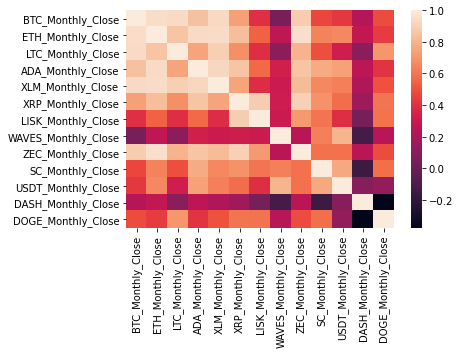

In [60]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2020_df.corr()
sns.heatmap(correlation)